In [40]:
import pickle
from Bio import SeqIO
from Bio import AlignIO
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [25]:

def load_mutation_dictionary(file_path):
    with open(file_path, "rb") as file:
        data = pickle.load(file)
    return data

# Example usage
denovo_mutations_file_path = "SARS-CoV-2_Sample_1_denovo_mutations_in_sampled_genomes.pkl"  
genomewise_mutation_dict = load_mutation_dictionary(denovo_mutations_file_path)


In [24]:
len(denovo_mutations)

4000

In [78]:
def get_position_wise_mutation_data(alignment_file, genomewise_mutation_dict):
    alignment = AlignIO.read(alignment_file, format="fasta")  
    alignment_length = alignment.get_alignment_length()  
    
    #Dictionary for storing the mutation data positionwise
    position_wise_mutation_data = {i+1: [] for i in range(alignment_length)}

    for genome in genomewise_mutation_dict:
        for mutation in genomewise_mutation_dict[genome]:
            position = int(mutation[0][1:-1])
            print(mutation, position, f"{mutation[0][0]}->{mutation[0][-1]}")
            position_wise_mutation_data[position].append((f"{mutation[0][0]}->{mutation[0][-1]}", genome))

    return position_wise_mutation_data


alignment_file = "SARS-CoV-2_Sample_1_4000+1_msa.fasta"
position_wise_mutation_data = get_position_wise_mutation_data(alignment_file, genomewise_mutation_dict)
 


['C3979T', 'ACC', 365] 3979 C->T
['G9334A', 'GGT', 452] 9334 G->A
['C12019T', 'TCT', 538] 12019 C->T
['G13486A', 'CGA', 94] 13486 G->A
['C14243T', 'CCA', 348] 14243 C->T
['A15014G', 'CAT', 487] 15014 A->G
['C376T', 'TCG', 114] 376 C->T
['T10353C', 'CTA', 558] 10353 T->C
['A11667G', 'TAG', 420] 11667 A->G
['C29893T', 'ACA', 798] 29893 C->T
['G5760T', 'AGT', 502] 5760 G->T
['A10373G', 'AAG', 582] 10373 A->G
['C29208T', 'ACA', 800] 29208 C->T
['G1861A', 'AGG', 326] 1861 G->A
['C3968A', 'ACT', 673] 3968 C->A
['G13184T', 'GGG', 135] 13184 G->T
['A1796T', 'AAA', 894] 1796 A->T
['G3115A', 'TGA', 624] 3115 G->A
['C12084T', 'CCA', 345] 12084 C->T
['C26264T', 'CCG', 75] 26264 C->T
['A6772G', 'TAG', 419] 6772 A->G
['C9342T', 'ACA', 799] 9342 C->T
['A22083T', 'AAA', 894] 22083 A->T
['G1630A', 'AGG', 326] 1630 G->A
['C1799T', 'GCA', 369] 1799 C->T
['G2479A', 'AGA', 600] 2479 G->A
['T6572C', 'TTA', 874] 6572 T->C
['C12710T', 'ACA', 799] 12710 C->T
['T13853C', 'GTC', 273] 13853 T->C
['T24564C', 'TTA'

In [79]:
position_wise_mutation_data

{1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [],
 22: [],
 23: [],
 24: [],
 25: [],
 26: [],
 27: [],
 28: [('T->G', 'OP288470.1')],
 29: [('A->G', 'OP288470.1')],
 30: [],
 31: [],
 32: [],
 33: [],
 34: [],
 35: [],
 36: [],
 37: [],
 38: [('T->C', 'PQ188157.1'), ('T->C', 'MW491194.1')],
 39: [],
 40: [],
 41: [],
 42: [],
 43: [],
 44: [],
 45: [],
 46: [],
 47: [],
 48: [],
 49: [],
 50: [],
 51: [],
 52: [],
 53: [],
 54: [],
 55: [],
 56: [('C->T', 'PP764001.1'), ('T->C', 'ON175190.1')],
 57: [],
 58: [],
 59: [],
 60: [],
 61: [],
 62: [],
 63: [],
 64: [],
 65: [],
 66: [],
 67: [],
 68: [],
 69: [],
 70: [],
 71: [],
 72: [],
 73: [],
 74: [],
 75: [],
 76: [('A->T', 'MT246477.1')],
 77: [('C->T', 'MT246477.1')],
 78: [],
 79: [],
 80: [],
 81: [],
 82: [],
 83: [('T->C', 'OR073394.1')],
 84: [],
 85: [('T->C', 'BS010644.1'),
  ('T->C', 'PP770972.

In [60]:
def count_mutations_in_window(mutations_dict, w):
    total_positions = max(mutations_dict.keys())
    positionwise_mutation_counts = {}
    
    for pos in range(1, total_positions - w + 2):  # Sliding window
        window_sum = sum(len(mutations_dict[i]) for i in range(pos, pos + w))
        positionwise_mutation_counts[pos] = window_sum/w
    
    return positionwise_mutation_counts


positionwise_mutation_counts = count_mutations_in_window(position_wise_mutation_data, w=10)

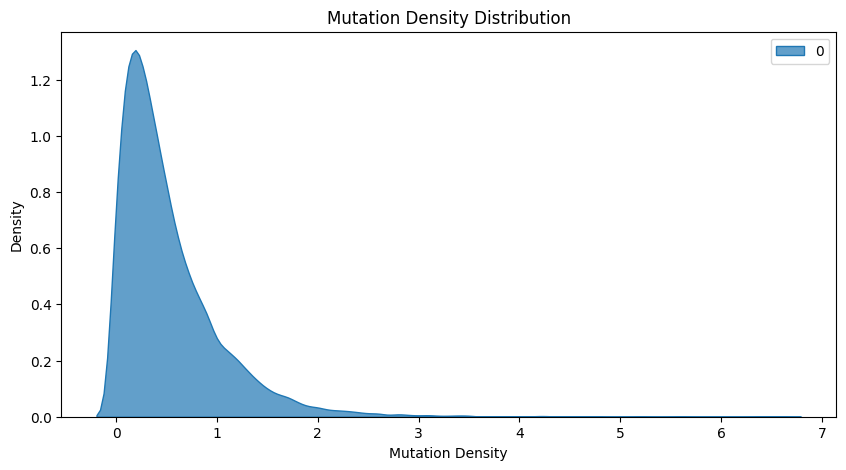

In [61]:
import seaborn as sns

# Create KDE plot
plt.figure(figsize=(10, 5))
sns.kdeplot(positionwise_mutation_counts.values(), fill=True, color='blue', alpha=0.7)

# Labels and title
plt.xlabel("Mutation Density")
plt.ylabel("Density")
plt.title("Mutation Density Distribution")

# Show plot
plt.show()

In [62]:
import numpy as np

# Assuming positionwise_mutation_counts is a dictionary containing mutation densities
mutation_densities = list(positionwise_mutation_counts.values())

# Calculate mean and standard deviation
mean = np.mean(mutation_densities)
std_dev = np.std(mutation_densities)

# Calculate mutation density corresponding to Z-score of 3
cutoff_z_score = mean + 3 * std_dev

print(f"The mutation density value for a Z-score of 3 is: {cutoff_z_score}")



The mutation density value for a Z-score of 3 is: 2.052029103071428


In [63]:
filtered_positionwise_mutation_counts = {pos: {positionwise_mutation_counts[pos]} for pos in positionwise_mutation_counts if positionwise_mutation_counts[pos] > cutoff_z_score}

In [64]:
filtered_positionwise_mutation_counts

{76: {2.8},
 77: {2.7},
 78: {2.6},
 79: {2.6},
 80: {2.6},
 81: {2.6},
 82: {2.6},
 83: {2.6},
 84: {2.5},
 85: {2.5},
 236: {2.8},
 237: {2.9},
 238: {2.9},
 239: {3.0},
 240: {3.0},
 241: {2.9},
 242: {3.0},
 243: {3.1},
 244: {3.1},
 254: {2.1},
 257: {2.1},
 711: {2.1},
 714: {2.2},
 715: {2.5},
 716: {2.3},
 717: {2.2},
 718: {2.2},
 861: {2.1},
 863: {2.1},
 864: {2.6},
 968: {2.2},
 969: {2.2},
 970: {2.2},
 971: {2.3},
 972: {2.4},
 973: {2.4},
 974: {2.6},
 975: {2.6},
 1223: {2.3},
 1224: {2.3},
 1225: {2.4},
 1226: {2.4},
 1227: {2.1},
 1852: {2.6},
 1853: {2.6},
 1854: {2.4},
 1855: {2.3},
 1856: {2.4},
 1857: {2.5},
 1858: {2.5},
 1859: {2.5},
 1860: {2.5},
 1861: {2.5},
 1946: {2.1},
 1947: {2.3},
 1948: {2.3},
 1949: {2.2},
 1950: {2.2},
 1951: {2.2},
 1952: {2.2},
 1953: {2.2},
 2176: {2.2},
 2177: {2.1},
 2178: {2.2},
 2742: {2.2},
 4368: {2.4},
 4369: {2.4},
 4370: {2.3},
 4371: {2.3},
 4372: {2.3},
 4373: {2.3},
 4374: {2.4},
 4375: {2.4},
 4376: {2.3},
 5559: {2.4}

In [73]:

def group_consecutive_positions(data):
    keys = sorted(data.keys())
    ranges = []
    start = keys[0]
    
    for i in range(1, len(keys)):
        if keys[i] != keys[i - 1] + 1:
            ranges.append(f"{start}-{keys[i - 1]}")
            start = keys[i]
    
    # Append the last range
    ranges.append(f"{start}-{keys[-1]}")
    
    return ranges

hypermutated_regions = group_consecutive_positions(filtered_positionwise_mutation_counts)

In [ ]:
iqtree2 -s "SARS-CoV-2_Sample_24_4000+1_msa.fasta" -o "NC_045512.2" -m "GTR+F+I+G4" -nt 30 -redo -fast -asr -pre Sample_24

In [86]:
for hypermutated_region in hypermutated_regions:
    print(hypermutated_region)
    start = int(hypermutated_region.split("-")[0])-1
    end = int(hypermutated_region.split("-")[-1])
    genomes=[]
    for index in range(start, end):
        print(index, position_wise_mutation_data[index+1])
        genomes+=[mutation[-1] for mutation in position_wise_mutation_data[index+1]]
    print(genomes)

    

76-85
75 [('A->T', 'MT246477.1')]
76 [('C->T', 'MT246477.1')]
77 []
78 []
79 []
80 []
81 []
82 [('T->C', 'OR073394.1')]
83 []
84 [('T->C', 'BS010644.1'), ('T->C', 'PP770972.1'), ('T->C', 'PP744606.1'), ('T->C', 'PP693597.1'), ('T->C', 'PP060249.1'), ('T->C', 'PP028145.1'), ('T->C', 'PP000751.1'), ('C->T', 'BS007462.1'), ('T->C', 'OR458722.1'), ('T->C', 'OR155251.1'), ('C->T', 'BS007325.1'), ('T->C', 'OQ913981.1'), ('T->C', 'OQ916186.1'), ('T->C', 'OQ651423.1'), ('T->C', 'OQ651619.1'), ('T->C', 'OQ422404.1'), ('T->C', 'OQ371899.1'), ('T->C', 'OQ074239.1'), ('C->T', 'OQ074331.1'), ('T->C', 'BS006189.1'), ('T->C', 'OP861207.1'), ('T->C', 'OP748601.1'), ('T->C', 'OP418567.1'), ('C->T', 'OP285958.1'), ('T->C', 'OP131027.1')]
['MT246477.1', 'MT246477.1', 'OR073394.1', 'BS010644.1', 'PP770972.1', 'PP744606.1', 'PP693597.1', 'PP060249.1', 'PP028145.1', 'PP000751.1', 'BS007462.1', 'OR458722.1', 'OR155251.1', 'BS007325.1', 'OQ913981.1', 'OQ916186.1', 'OQ651423.1', 'OQ651619.1', 'OQ422404.1', 'OQ

In [83]:
position_wise_mutation_data

{1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [],
 22: [],
 23: [],
 24: [],
 25: [],
 26: [],
 27: [],
 28: [('T->G', 'OP288470.1')],
 29: [('A->G', 'OP288470.1')],
 30: [],
 31: [],
 32: [],
 33: [],
 34: [],
 35: [],
 36: [],
 37: [],
 38: [('T->C', 'PQ188157.1'), ('T->C', 'MW491194.1')],
 39: [],
 40: [],
 41: [],
 42: [],
 43: [],
 44: [],
 45: [],
 46: [],
 47: [],
 48: [],
 49: [],
 50: [],
 51: [],
 52: [],
 53: [],
 54: [],
 55: [],
 56: [('C->T', 'PP764001.1'), ('T->C', 'ON175190.1')],
 57: [],
 58: [],
 59: [],
 60: [],
 61: [],
 62: [],
 63: [],
 64: [],
 65: [],
 66: [],
 67: [],
 68: [],
 69: [],
 70: [],
 71: [],
 72: [],
 73: [],
 74: [],
 75: [],
 76: [('A->T', 'MT246477.1')],
 77: [('C->T', 'MT246477.1')],
 78: [],
 79: [],
 80: [],
 81: [],
 82: [],
 83: [('T->C', 'OR073394.1')],
 84: [],
 85: [('T->C', 'BS010644.1'),
  ('T->C', 'PP770972.